In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Load the CSV file
file_path = 'venice.csv'  # Replace with the path to your file
data = pd.read_csv(file_path)

# Convert the 'date' column to a datetime object
data['date'] = pd.to_datetime(data['date'])
#convert the 'waterArea' column to a float object
data['waterArea'] = data['waterArea'].astype(float)

# Group the data by year and calculate the yearly mean of waterArea
data['year'] = data['date'].dt.year
yearly_mean = data.groupby('year')['waterArea'].mean()

# Create an empty dictionary to store the mean of below-average waterArea for each year
below_avg_mean = {}

# Loop through each year, filter data below the mean, and calculate the mean for these values
for year in range(2020, 2025):
    # Filter data for the specific year
    yearly_data = data[data['year'] == year]
    # Get the yearly mean
    mean_value = yearly_mean.loc[year]
    # Filter rows where waterArea is below the yearly mean
    below_mean_data = yearly_data[yearly_data['waterArea'] < mean_value]
    # Calculate the mean of waterArea for these filtered rows
    below_avg_mean[year] = below_mean_data['waterArea'].mean()


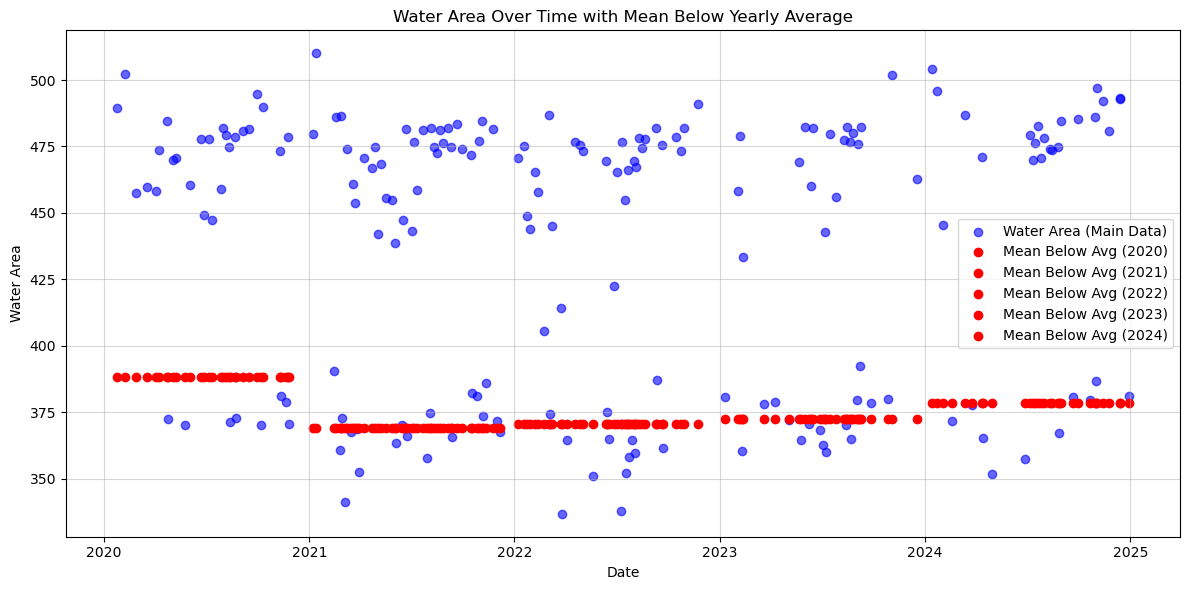

In [4]:
# Plot the full data
plt.figure(figsize=(12, 6))

# Plot the main data (blue points)
plt.scatter(data['date'], data['waterArea'], color='blue', label='Water Area (Main Data)', alpha=0.6)

# Plot the mean below the average for each year (red line as points)
for year in range(2020, 2025):
    # Get the dates and below-average mean value for this year
    year_data = data[data['year'] == year]
    below_mean_value = below_avg_mean[year]
    
    # Add red horizontal points for the mean below the yearly average
    plt.scatter(year_data['date'], [below_mean_value] * len(year_data), color='red', label=f'Mean Below Avg ({year})')

# Add labels, legend, and title
plt.xlabel('Date')
plt.ylabel('Water Area')
plt.title('Water Area Over Time with Mean Below Yearly Average')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()

plt.show()
